**Load the dataset**

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
import glob
# Import the dataset
file = glob.glob("main.csv")

In [3]:
print(file)

['main.csv']


In [4]:
df = pd.read_csv("main.csv")

In [5]:
# Display the first 5 rows
df.head()

,Unnamed: 0,Customer_Key,Order_Key,order_source,created_at,dispatch_time,actual_delivery_time,bill_amount,cart_amount,coupon_id,delivery_fee,store_key,delivery_city,pdt,Store_lat,Store_long,delivery_location_latitude,delivery_location_longitude,pay_mode_grouped
0,1,CUST_1,ORD_1,Mobile,2024-03-01T03:33:35,NaN,NaN,263,199.0,8043589.0,29.40,STORE_1,CITY_1,45.0,28.623269,77.035176,28.630476,77.029983,Credit/BNPL
1,2,CUST_2,ORD_2,Mobile,2024-03-01T03:55:46,2024-03-01T04:12:56,2024-03-01T04:22:16,341,417.0,7670379.0,9.45,STORE_2,CITY_2,45.0,28.462377,77.080403,28.460245,77.083425,UPI
2,3,CUST_3,ORD_3,Mobile,2024-03-01T04:37:43,2024-03-01T04:47:54,2024-03-01T04:59:28,180,228.0,7987325.0,0.00,STORE_3,CITY_1,39.0,28.633497,77.281993,28.625607,77.299079,Credit/BNPL
3,4,CUST_4,ORD_4,Mobile,2024-03-01T04:37:58,2024-03-01T04:56:32,2024-03-01T05:20:58,541,557.0,7987325.0,0.00,STORE_4,CITY_1,45.0,28.566044,77.197894,28.580365,77.206151,UPI
4,5,CUST_5,ORD_5,Mobile,2024-03-01T04:40:33,NaN,NaN,238,219.0,8043589.0,0.00,STORE_5,CITY_3,45.0,28.390421,77.306137,28.365680,77.298400,UPI


In [6]:
df.describe()

,Unnamed: 0,bill_amount,cart_amount,coupon_id,delivery_fee,pdt,Store_lat,Store_long,delivery_location_latitude,delivery_location_longitude
count,517773.000000,517773.000000,517773.000000,2.277010e+05,517773.000000,517692.000000,513522.000000,513522.000000,517773.000000,517773.000000
mean,258887.000000,393.239557,481.027408,7.875333e+06,3.502124,44.212478,24.910444,75.552630,24.938574,75.568351
std,149468.334802,357.606294,445.781234,5.561300e+05,7.905318,7.892544,4.607374,2.102193,4.600685,2.157995
min,1.000000,0.000000,0.000000,2.977450e+05,0.000000,20.000000,12.824086,72.804613,-5.365017,-97.753226
25%,129444.000000,206.000000,258.000000,7.987325e+06,0.000000,39.000000,19.173246,72.934573,19.182340,72.934085
50%,258887.000000,306.000000,369.000000,8.012285e+06,0.000000,44.000000,28.483085,77.077506,28.479030,77.077450
75%,388330.000000,533.000000,599.000000,8.039671e+06,0.000000,49.000000,28.612921,77.258294,28.618600,77.250390
max,517773.000000,19488.000000,33210.000000,8.053911e+06,78.750000,183.000000,28.707777,77.762851,41.032327,91.788640


In [7]:
df.columns

Index(['Unnamed: 0', 'Customer_Key', 'Order_Key', 'order_source', 'created_at',
       'dispatch_time', 'actual_delivery_time', 'bill_amount', 'cart_amount',
       'coupon_id', 'delivery_fee', 'store_key', 'delivery_city', 'pdt',
       'Store_lat', 'Store_long', 'delivery_location_latitude',
       'delivery_location_longitude', 'pay_mode_grouped'],
      dtype='object')

In [8]:
# Remove the index column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# Check for the columns with null values
df.isnull().sum().sort_values(ascending=False)

coupon_id                      290072
actual_delivery_time            96428
dispatch_time                   87167
Store_long                       4251
Store_lat                        4251
pdt                                81
Customer_Key                        0
delivery_city                       0
delivery_location_longitude         0
delivery_location_latitude          0
delivery_fee                        0
store_key                           0
Order_Key                           0
cart_amount                         0
bill_amount                         0
created_at                          0
order_source                        0
pay_mode_grouped                    0
dtype: int64

In [10]:
# Drop the observations with null values in 'pdt' and 'actual_delivery_time'
df.dropna(subset=['pdt'], inplace=True)
df.dropna(subset='actual_delivery_time', inplace=True)

In [11]:
# Check with 'pdt' and 'actual_delivery_time' have no null values
df.isnull().sum().sort_values(ascending=False)

coupon_id                      232302
Store_long                       3501
Store_lat                        3501
dispatch_time                     275
Customer_Key                        0
store_key                           0
delivery_location_longitude         0
delivery_location_latitude          0
pdt                                 0
delivery_city                       0
delivery_fee                        0
Order_Key                           0
cart_amount                         0
bill_amount                         0
actual_delivery_time                0
created_at                          0
order_source                        0
pay_mode_grouped                    0
dtype: int64

In [12]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['dispatch_time'] = pd.to_datetime(df['dispatch_time'], errors='coerce')

In [13]:
# ADT in minutes- Calculate actual delivery time in minutes
df['adt_mins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [14]:
print(df[['created_at', 'actual_delivery_time', 'adt_mins', 'pdt']].head())

           created_at actual_delivery_time   adt_mins   pdt
1 2024-03-01 03:55:46  2024-03-01 04:22:16  26.500000  45.0
2 2024-03-01 04:37:43  2024-03-01 04:59:28  21.750000  39.0
3 2024-03-01 04:37:58  2024-03-01 05:20:58  43.000000  45.0
6 2024-03-01 05:03:28  2024-03-01 05:49:24  45.933333  46.0
8 2024-03-01 05:40:46  2024-03-01 06:12:23  31.616667  42.0


In [15]:
df['create_dispatch_time'] = (df['dispatch_time'] - df['created_at']).dt.total_seconds() / 60
df['dispatch_delivery_time'] = (df['actual_delivery_time'] - df['dispatch_time']).dt.total_seconds() / 60

In [16]:
df['create_dispatch_time'].describe()

count    421003.000000
mean         18.901949
std          41.579804
min         -52.283333
25%          11.350000
50%          15.650000
75%          21.616667
max       13158.300000
Name: create_dispatch_time, dtype: float64

In [17]:
df['dispatch_delivery_time'].describe()

count    421003.000000
mean         16.820547
std          14.273787
min           0.016667
25%          10.183333
50%          14.450000
75%          20.466667
max        1098.016667
Name: dispatch_delivery_time, dtype: float64

In [18]:
# Diff in adt and pdt
df['adt_pdt_diff'] = ((df['adt_mins'] - df['pdt']))
print(df['adt_pdt_diff'].describe())

count    421278.000000
mean         -8.213893
std          45.114231
min        -168.383333
25%         -18.250000
50%         -11.666667
75%          -3.450000
max       13124.966667
Name: adt_pdt_diff, dtype: float64


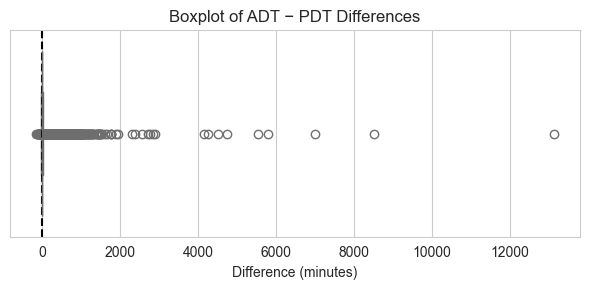

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.boxplot(x=df['adt_pdt_diff'], color='lightcoral')
plt.title('Boxplot of ADT − PDT Differences')
plt.xlabel('Difference (minutes)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [20]:
df['adt_flag'] = df.apply(
    lambda x: 'weird' if abs((x['adt_mins'] - x['pdt']) / x['pdt']) > 1 else 'normal',
    axis=1
)

In [21]:
weird_orders = df[df['adt_flag'] == 'weird'][
    ['Order_Key', 'created_at', 'actual_delivery_time', 'adt_mins', 'pdt', 'adt_pdt_diff', 'delivery_city', 'store_key']
]

print(weird_orders.head(10))
print(f"Total weird orders: {len(weird_orders)}")

    Order_Key          created_at actual_delivery_time    adt_mins   pdt  \
22     ORD_23 2024-03-01 08:15:00  2024-03-01 08:05:11   -9.816667  50.0   
25     ORD_26 2024-03-01 14:30:00  2024-03-01 14:20:06   -9.900000  36.0   
32     ORD_33 2024-03-01 06:32:00  2024-03-01 08:32:51  120.850000  49.0   
33     ORD_33 2024-03-01 06:32:00  2024-03-01 08:32:51  120.850000  49.0   
34     ORD_33 2024-03-01 06:32:00  2024-03-01 08:32:51  120.850000  49.0   
276   ORD_275 2024-03-01 12:00:00  2024-03-01 11:54:56   -5.066667  42.0   
304    ORD_33 2024-03-01 06:32:00  2024-03-01 08:32:51  120.850000  49.0   
362   ORD_339 2024-03-01 13:00:00  2024-03-01 12:59:46   -0.233333  46.0   
447   ORD_404 2024-03-01 12:52:00  2024-03-01 16:06:07  194.116667  75.0   
565   ORD_521 2024-03-01 07:00:00  2024-03-01 06:52:44   -7.266667  56.0   

     adt_pdt_diff delivery_city store_key  
22     -59.816667        CITY_1  STORE_20  
25     -45.900000        CITY_4  STORE_16  
32      71.850000        CITY_1

In [22]:
df.head()

,Customer_Key,Order_Key,order_source,created_at,dispatch_time,actual_delivery_time,bill_amount,cart_amount,coupon_id,delivery_fee,...,Store_lat,Store_long,delivery_location_latitude,delivery_location_longitude,pay_mode_grouped,adt_mins,create_dispatch_time,dispatch_delivery_time,adt_pdt_diff,adt_flag
1,CUST_2,ORD_2,Mobile,2024-03-01 03:55:46,2024-03-01 04:12:56,2024-03-01 04:22:16,341,417.0,7670379.0,9.45,...,28.462377,77.080403,28.460245,77.083425,UPI,26.500000,17.166667,9.333333,-18.500000,normal
2,CUST_3,ORD_3,Mobile,2024-03-01 04:37:43,2024-03-01 04:47:54,2024-03-01 04:59:28,180,228.0,7987325.0,0.00,...,28.633497,77.281993,28.625607,77.299079,Credit/BNPL,21.750000,10.183333,11.566667,-17.250000,normal
3,CUST_4,ORD_4,Mobile,2024-03-01 04:37:58,2024-03-01 04:56:32,2024-03-01 05:20:58,541,557.0,7987325.0,0.00,...,28.566044,77.197894,28.580365,77.206151,UPI,43.000000,18.566667,24.433333,-2.000000,normal
6,CUST_7,ORD_7,Mobile,2024-03-01 05:03:28,2024-03-01 05:48:15,2024-03-01 05:49:24,145,129.0,NaN,0.00,...,28.526643,77.155026,28.539510,77.118730,CRED,45.933333,44.783333,1.150000,-0.066667,normal
8,CUST_9,ORD_9,Mobile,2024-03-01 05:40:46,2024-03-01 05:53:19,2024-03-01 06:12:23,359,475.0,8039734.0,0.00,...,28.677473,77.317286,28.688930,77.289900,Credit/BNPL,31.616667,12.550000,19.066667,-10.383333,normal


In [23]:
dfsorted = df.sort_values(by=['adt_mins'], ascending=False)
columns =  ['Order_Key', 'created_at', 'actual_delivery_time', 'adt_mins', 'pdt', 'adt_pdt_diff', 'delivery_city', 'store_key']
dfsorted[columns]

,Order_Key,created_at,actual_delivery_time,adt_mins,pdt,adt_pdt_diff,delivery_city,store_key
484255,ORD_439895,2023-12-31 09:22:18,2024-01-09 12:51:16,13168.966667,44.0,13124.966667,CITY_4,STORE_27
512520,ORD_468160,2023-12-31 14:29:28,2024-01-06 13:00:12,8550.733333,54.0,8496.733333,CITY_1,STORE_68
367668,ORD_323308,2024-01-16 10:35:09,2024-01-21 08:18:13,7063.066667,59.0,7004.066667,CITY_4,STORE_48
499422,ORD_455062,2024-01-12 11:22:23,2024-01-16 12:32:48,5830.416667,48.0,5782.416667,CITY_4,STORE_32
436836,ORD_392476,2023-12-28 18:11:45,2024-01-01 15:13:45,5582.000000,41.0,5541.000000,CITY_1,STORE_47
...,...,...,...,...,...,...,...,...
122788,ORD_94083,2024-03-17 12:30:00,2024-03-17 12:02:43,-27.283333,39.0,-66.283333,CITY_2,STORE_42
111608,ORD_85487,2024-03-16 15:00:00,2024-03-16 14:32:26,-27.566667,58.0,-85.566667,CITY_4,STORE_67
117571,ORD_90075,2024-03-17 11:00:00,2024-03-17 10:32:24,-27.600000,28.0,-55.600000,CITY_1,STORE_1
57008,ORD_43653,2024-03-08 18:30:00,2024-03-08 18:00:00,-30.000000,48.0,-78.000000,CITY_3,STORE_61


***In the above output we see that few orders show abnormality with adt >> pdt.***

<span style="color: Blue;">**Lets Check if average 'pdt' differs for the different cities**</span>

/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/1833703722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pdt, x='delivery_city', y='pdt', palette='viridis')


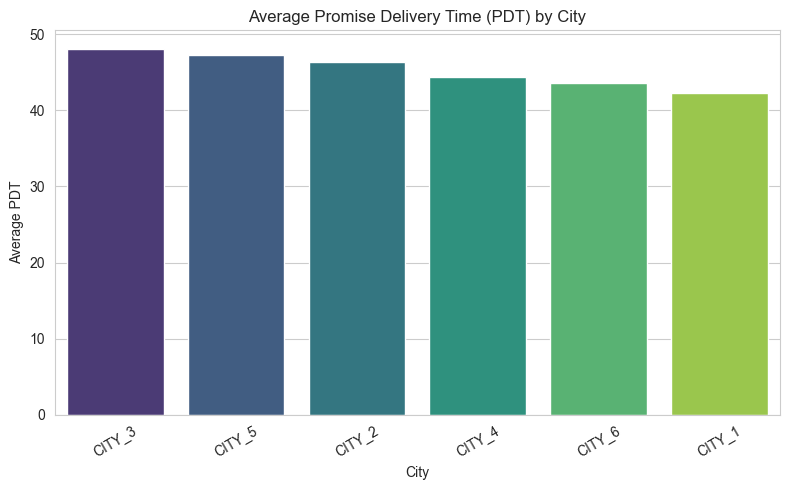

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and calculate average PDT
avg_pdt = df.groupby('delivery_city')['pdt'].mean().reset_index()

# Sort by average PDT for better visuals
avg_pdt = avg_pdt.sort_values(by='pdt', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pdt, x='delivery_city', y='pdt', palette='viridis')

# Add titles and labels
plt.title('Average Promise Delivery Time (PDT) by City')
plt.xlabel('City')
plt.ylabel('Average PDT')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<span style="color: Blue;">**Lets Check if average 'adt' differs for different cities**</span>

/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/1503545295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adt, x='delivery_city', y='adt_mins', palette='viridis')


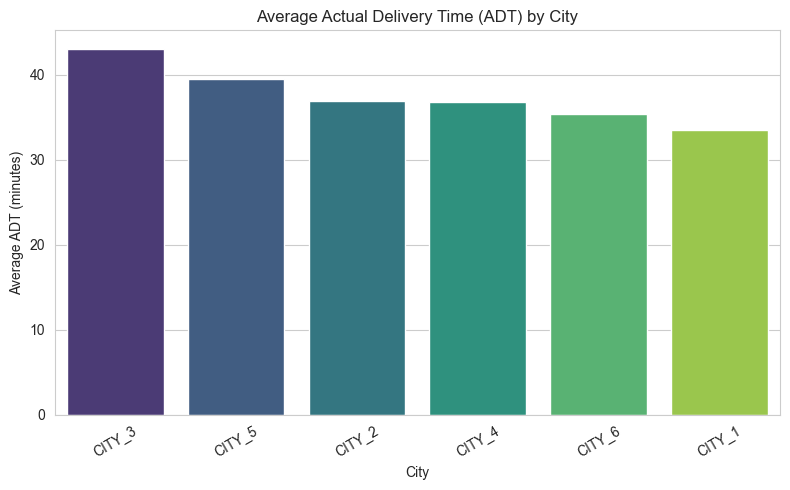

In [25]:
# Group by city and calculate average ADT
avg_adt = df.groupby('delivery_city')['adt_mins'].mean().reset_index()

# Sort by average ADT for better visuals
avg_adt = avg_adt.sort_values(by='adt_mins', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_adt, x='delivery_city', y='adt_mins', palette='viridis')

# Add titles and labels
plt.title('Average Actual Delivery Time (ADT) by City')
plt.xlabel('City')
plt.ylabel('Average ADT (minutes)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [26]:
# Merge both on city
city_comparison = pd.merge(avg_adt, avg_pdt, on='delivery_city', how='inner')

# Calculate the difference
city_comparison['adt_minus_pdt'] = city_comparison['adt_mins'] - city_comparison['pdt']

# Sort by difference for clarity
city_comparison = city_comparison.sort_values(by='adt_minus_pdt', ascending=False)

print(city_comparison)

  delivery_city   adt_mins        pdt  adt_minus_pdt
0        CITY_3  43.042463  48.071298      -5.028835
3        CITY_4  36.772455  44.380627      -7.608172
1        CITY_5  39.447312  47.249885      -7.802573
4        CITY_6  35.318347  43.559812      -8.241464
5        CITY_1  33.474006  42.241275      -8.767270
2        CITY_2  36.841633  46.313823      -9.472190


***We can see that for every city, the avg pdt > avg adt. City_3 shows the highest average Actual Delivery Time (ADT) as well as the highest Promised Delivery Time (PDT), indicating longer delivery durations and more conservative delivery promises compared to other cities.***

<span style="color: Orange;">**Check if there difference in 'pdt' at peak hours (traffic and order peak)**</span>

In [27]:
# Convert to datetime if not already
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract hour
df['order_hour'] = df['created_at'].dt.hour

# Traffic-based peak hours: 7–10 AM and 5–9 PM
df['traffic_peak'] = df['order_hour'].apply(
    lambda x: 'peak' if (7 <= x <= 10) or (17 <= x <= 21) else 'non_peak'
)

# Order-volume-based peak hours: 11 AM–2 PM and 6–9 PM
df['order_peak'] = df['order_hour'].apply(
    lambda x: 'peak' if (11 <= x <= 14) or (18 <= x <= 21) else 'non_peak'
)

In [28]:
traffic_pdt = df.groupby('traffic_peak')['pdt'].mean().reset_index()
order_pdt = df.groupby('order_peak')['pdt'].mean().reset_index()

print("Traffic-based peak vs non-peak PDT:")
print(traffic_pdt)

print("\nOrder-volume-based peak vs non-peak PDT:")
print(order_pdt)

Traffic-based peak vs non-peak PDT:
  traffic_peak        pdt
0     non_peak  45.186386
1         peak  42.868741

Order-volume-based peak vs non-peak PDT:
  order_peak        pdt
0   non_peak  44.107649
1       peak  44.209878


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2656845961.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_pdt, x='traffic_peak', y='pdt', palette='Set2')
/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2656845961.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_pdt, x='order_peak', y='pdt', palette='Set3')


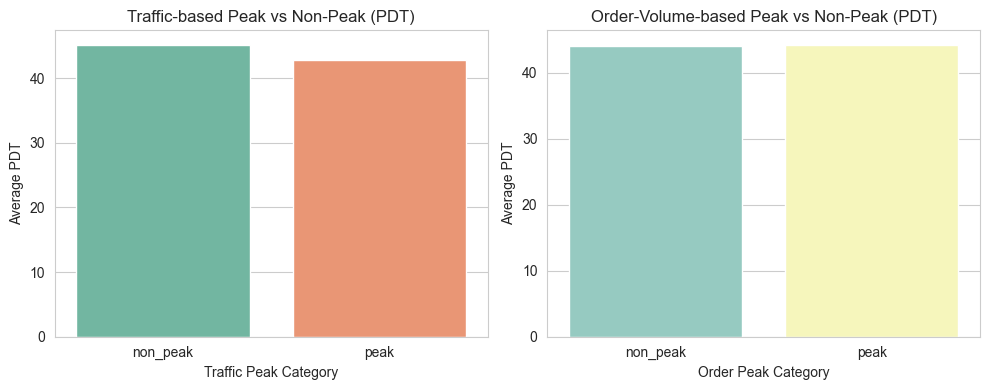

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=traffic_pdt, x='traffic_peak', y='pdt', palette='Set2')
plt.title('Traffic-based Peak vs Non-Peak (PDT)')
plt.xlabel('Traffic Peak Category')
plt.ylabel('Average PDT')

plt.subplot(1,2,2)
sns.barplot(data=order_pdt, x='order_peak', y='pdt', palette='Set3')
plt.title('Order-Volume-based Peak vs Non-Peak (PDT)')
plt.xlabel('Order Peak Category')
plt.ylabel('Average PDT')

plt.tight_layout()
plt.show()

<span style="color: Orange;">**Check if there difference in 'adt' at peak hours (traffic and order peak)**</span>

In [30]:
# Traffic-based peak vs non-peak ADT
traffic_adt = df.groupby('traffic_peak')['adt_mins'].mean().reset_index()

# Order-volume-based peak vs non-peak ADT
order_adt = df.groupby('order_peak')['adt_mins'].mean().reset_index()

print("Traffic-based peak vs non-peak ADT:")
print(traffic_adt)

print("\nOrder-volume-based peak vs non-peak ADT:")
print(order_adt)

Traffic-based peak vs non-peak ADT:
  traffic_peak   adt_mins
0     non_peak  37.328175
1         peak  34.217214

Order-volume-based peak vs non-peak ADT:
  order_peak   adt_mins
0   non_peak  35.605076
1       peak  36.452036


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/3966300707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_adt, x='traffic_peak', y='adt_mins', palette='Set2')
/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/3966300707.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_adt, x='order_peak', y='adt_mins', palette='Set3')


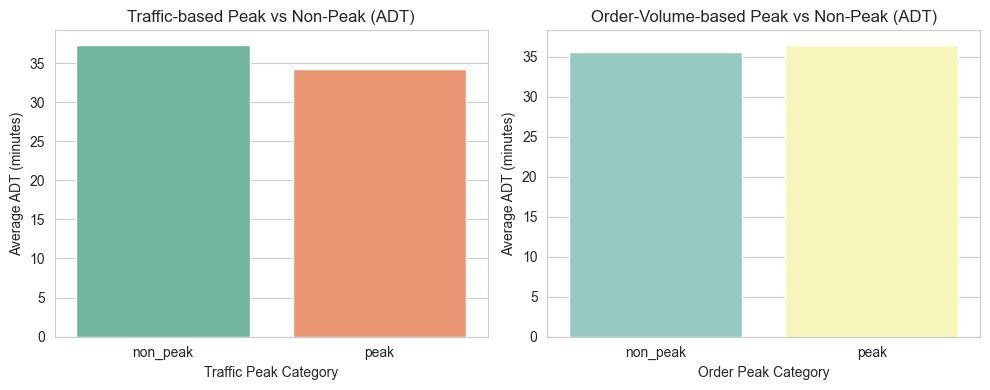

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

# Traffic-based ADT
plt.subplot(1,2,1)
sns.barplot(data=traffic_adt, x='traffic_peak', y='adt_mins', palette='Set2')
plt.title('Traffic-based Peak vs Non-Peak (ADT)')
plt.xlabel('Traffic Peak Category')
plt.ylabel('Average ADT (minutes)')

# Order-volume-based ADT
plt.subplot(1,2,2)
sns.barplot(data=order_adt, x='order_peak', y='adt_mins', palette='Set3')
plt.title('Order-Volume-based Peak vs Non-Peak (ADT)')
plt.xlabel('Order Peak Category')
plt.ylabel('Average ADT (minutes)')

plt.tight_layout()
plt.show()

In [32]:
traffic_summary = df.groupby('traffic_peak')[['adt_mins', 'pdt']].mean().reset_index()
traffic_summary['diff_adt_pdt'] = traffic_summary['adt_mins'] - traffic_summary['pdt']

# Order-volume-based averages
order_summary = df.groupby('order_peak')[['adt_mins', 'pdt']].mean().reset_index()
order_summary['diff_adt_pdt'] = order_summary['adt_mins'] - order_summary['pdt']

In [33]:
print("Traffic-based Peak vs Non-Peak:")
print(traffic_summary)

print("\nOrder-volume-based Peak vs Non-Peak:")
print(order_summary)

Traffic-based Peak vs Non-Peak:
  traffic_peak   adt_mins        pdt  diff_adt_pdt
0     non_peak  37.328175  45.186386     -7.858211
1         peak  34.217214  42.868741     -8.651528

Order-volume-based Peak vs Non-Peak:
  order_peak   adt_mins        pdt  diff_adt_pdt
0   non_peak  35.605076  44.107649     -8.502573
1       peak  36.452036  44.209878     -7.757842


***We can see that avg adt < avg pdt for both traffic-based and Order-volume based peak, suggesting that the delivery time promises and actual deliveries are shorter, possibly due to optimized routing or prioritization during busy hours. Typically, we would expect ADT during peak hours (both traffic and order peaks) to be higher than during non-peak hours due to congestion or increased order load. However, the results show the opposite trend for traffic peaks (peak ADT < non-peak ADT) and a slight increase for order-volume peaks (peak ADT > non-peak ADT). This suggests that traffic-peak operations might be better optimized, whereas higher order volumes still lead to marginally longer delivery times.***

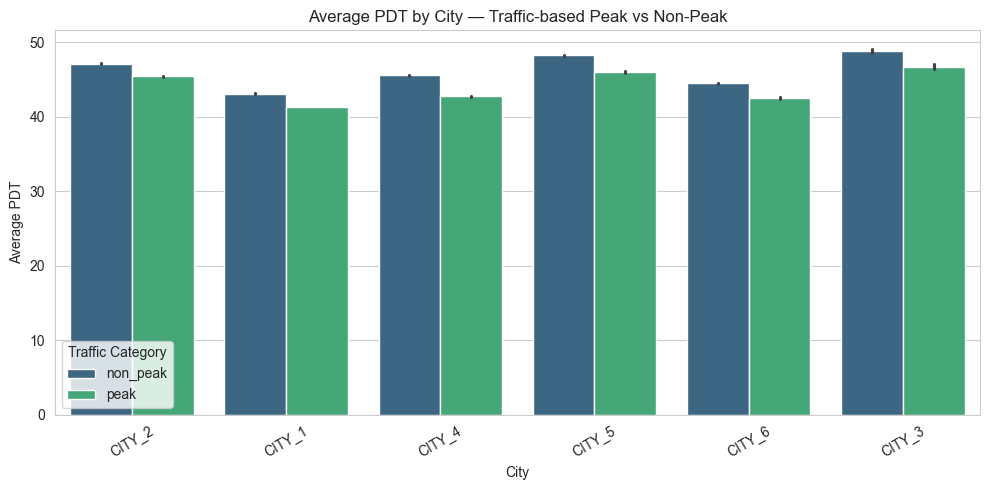

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='delivery_city', y='pdt', hue='traffic_peak', palette='viridis')
plt.title('Average PDT by City — Traffic-based Peak vs Non-Peak')
plt.xlabel('City')
plt.ylabel('Average PDT')
plt.legend(title='Traffic Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

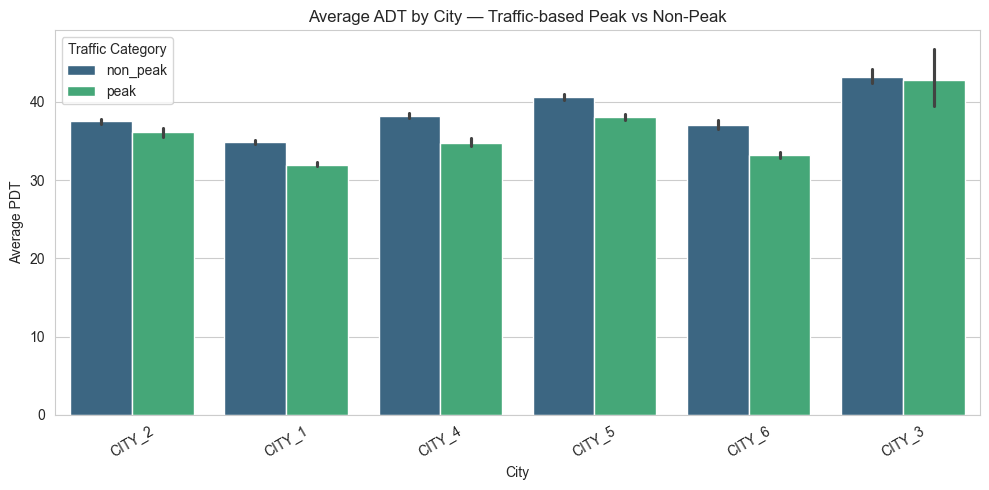

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='delivery_city', y='adt_mins', hue='traffic_peak', palette='viridis')
plt.title('Average ADT by City — Traffic-based Peak vs Non-Peak')
plt.xlabel('City')
plt.ylabel('Average PDT')
plt.legend(title='Traffic Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

avg_city_peak = (
    df.groupby(['delivery_city', 'traffic_peak'])[['adt_mins', 'pdt']]
    .mean()
    .reset_index()
)
avg_city_peak['adt_minus_pdt'] = avg_city_peak['adt_mins'] - avg_city_peak['pdt']
adt_pdt_diff_city = avg_city_peak.pivot(
    index='delivery_city',
    columns='traffic_peak',
    values='adt_minus_pdt'
).reset_index()

# Clean column names
adt_pdt_diff_city.columns.name = None
adt_pdt_diff_city = adt_pdt_diff_city.rename(columns={
    'peak': 'diff_peak',
    'non_peak': 'diff_nonpeak'
})

print(adt_pdt_diff_city)

  delivery_city  diff_nonpeak  diff_peak
0        CITY_1     -8.254956  -9.329318
1        CITY_2     -9.601820  -9.327831
2        CITY_3     -5.631930  -3.974263
3        CITY_4     -7.336587  -7.983116
4        CITY_5     -7.659589  -7.979956
5        CITY_6     -7.363687  -9.314433


***Across all cities, both peak and non-peak periods show negative differences (ADT − PDT), meaning deliveries are consistently completed faster than promised.</br>
The magnitude of difference is fairly similar between peak and non-peak hours (around 7–9 minutes faster), indicating that traffic conditions have minimal impact on delivery timeliness.</br>
City_3 shows the smallest difference, suggesting that delivery promises there are more closely aligned with actual delivery times compared to other cities.***

<span style="color: Purple;">**Does 'pdt' depend on the ordering day of the Week**</span>

In [37]:
# Ensure created_at is datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract day of week (Monday=0, Sunday=6)
df['day_of_week'] = df['created_at'].dt.dayofweek

# Label as weekday/weekend
df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')

In [38]:
avg_pdt_daytype = df.groupby('day_type')['pdt'].mean().reset_index()
print(avg_pdt_daytype)

  day_type        pdt
0  weekday  43.920386
1  weekend  44.535989


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2263096991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pdt_daytype, x='day_type', y='pdt', palette='coolwarm')


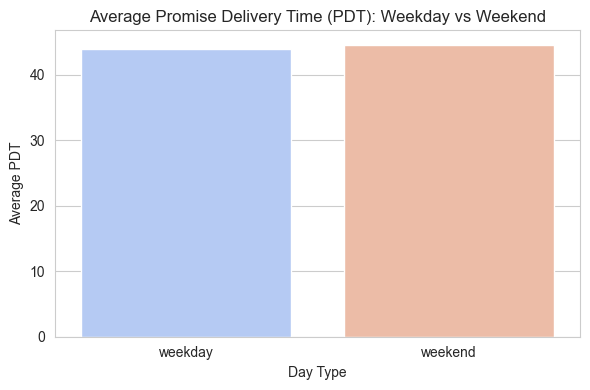

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=avg_pdt_daytype, x='day_type', y='pdt', palette='coolwarm')
plt.title('Average Promise Delivery Time (PDT): Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average PDT')
plt.tight_layout()
plt.show()

/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/3090777104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pdt_day, x='day_name', y='pdt', palette='crest')


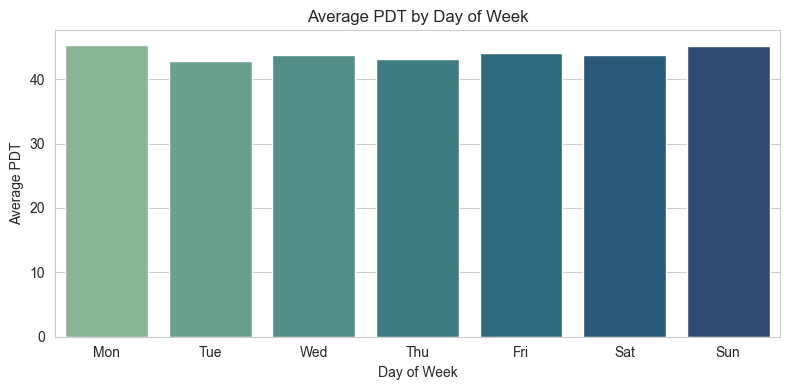

In [40]:
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['day_of_week'].map(day_map)

avg_pdt_day = df.groupby('day_name')['pdt'].mean().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avg_pdt_day, x='day_name', y='pdt', palette='crest')
plt.title('Average PDT by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average PDT')
plt.tight_layout()
plt.show()

<span style="color: Purple;">**Does 'adt' depend on the ordering day of the Week**</span>

In [41]:
avg_adt_daytype = df.groupby('day_type')['adt_mins'].mean().reset_index()
print(avg_adt_daytype)

  day_type   adt_mins
0  weekday  35.342452
1  weekend  36.945784


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2525991524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adt_daytype, x='day_type', y='adt_mins', palette='crest')


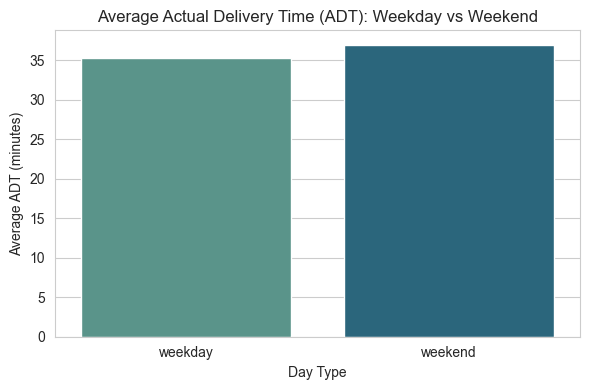

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=avg_adt_daytype, x='day_type', y='adt_mins', palette='crest')
plt.title('Average Actual Delivery Time (ADT): Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average ADT (minutes)')
plt.tight_layout()
plt.show()

/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/461665416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adt_day, x='day_name', y='adt_mins', palette='viridis')


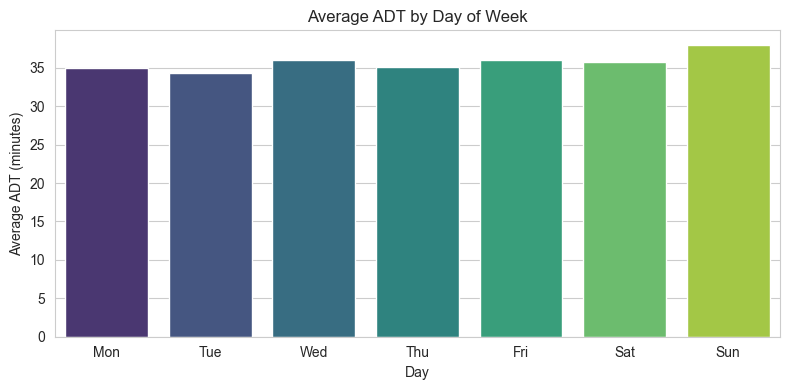

In [43]:
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['day_of_week'].map(day_map)

avg_adt_day = (
    df.groupby('day_name')['adt_mins']
    .mean()
    .reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.barplot(data=avg_adt_day, x='day_name', y='adt_mins', palette='viridis')
plt.title('Average ADT by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average ADT (minutes)')
plt.tight_layout()
plt.show()

In [44]:
avg_times = (
    df.groupby('day_type')[['adt_mins', 'pdt']]
    .mean()
    .reset_index()
)

In [45]:
avg_times['diff_adt_pdt'] = avg_times['adt_mins'] - avg_times['pdt']
print(avg_times)

  day_type   adt_mins        pdt  diff_adt_pdt
0  weekday  35.342452  43.920386     -8.577935
1  weekend  36.945784  44.535989     -7.590205


***The average ADT remains consistently below the PDT for both weekdays and weekends, confirming that delivery promises are conservative and generally overestimated.Across Weekday and Weekend, the avg adt is slightly greater (1.6mins) for Weekend than that of Week day, while pdt only increase marginall.***

<span style="color: Green;">**Does 'pdt' depend on the store-key**</span>

In [46]:
avg_pdt_store = df.groupby('store_key')['pdt'].mean().reset_index()

# Sort for better visualization
avg_pdt_store = avg_pdt_store.sort_values(by='pdt', ascending=False)

print(avg_pdt_store.head())

     store_key        pdt
96    STORE_62  52.951187
8    STORE_106  51.250000
26   STORE_122  51.000000
134   STORE_97  50.252309
3    STORE_101  50.000000


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2373520900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stores, x='store_key', y='pdt', palette='viridis')


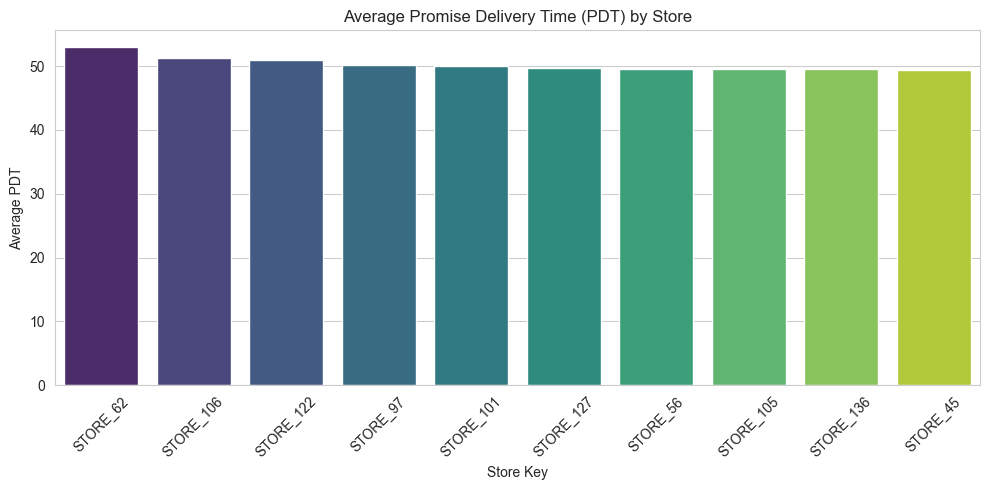

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show top 10 stores with highest average PDT
top_stores = avg_pdt_store.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_stores, x='store_key', y='pdt', palette='viridis')
plt.title('Average Promise Delivery Time (PDT) by Store')
plt.xlabel('Store Key')
plt.ylabel('Average PDT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: Green;">**Does 'adt' depend on the store-key**</span>

In [48]:
import pandas as pd

avg_adt_store = (
    df.groupby('store_key')['adt_mins']
    .mean()
    .reset_index()
    .sort_values(by='adt_mins', ascending=False)
)

avg_adt_store.head()

,store_key,adt_mins
35,STORE_130,96.600000
121,STORE_85,96.446685
40,STORE_135,71.158333
22,STORE_119,67.891667
38,STORE_133,60.216667


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/1364217955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adt_store.head(10), x='store_key', y='adt_mins', palette='viridis')


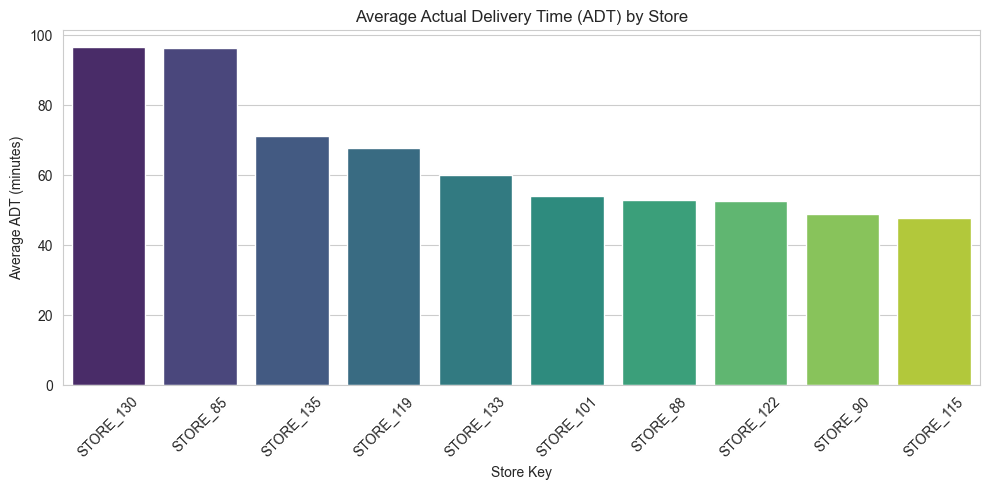

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=avg_adt_store.head(10), x='store_key', y='adt_mins', palette='viridis')
plt.title('Average Actual Delivery Time (ADT) by Store')
plt.xlabel('Store Key')
plt.ylabel('Average ADT (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
store_comparison = pd.merge(avg_adt_store, avg_pdt_store, on='store_key', how='inner')

# Difference = ADT - PDT
store_comparison['adt_minus_pdt'] = store_comparison['adt_mins'] - store_comparison['pdt']

# Sort by difference (largest delay on top)
store_comparison = store_comparison.sort_values(by='adt_minus_pdt', ascending=False)

print(store_comparison)

     store_key   adt_mins        pdt  adt_minus_pdt
1     STORE_85  96.446685  41.299728      55.146957
0    STORE_130  96.600000  46.750000      49.850000
2    STORE_135  71.158333  41.000000      30.158333
4    STORE_133  60.216667  36.000000      24.216667
3    STORE_119  67.891667  45.500000      22.391667
..         ...        ...        ...            ...
117  STORE_105  29.333333  49.500000     -20.166667
136  STORE_137  14.183333  35.000000     -20.816667
129  STORE_128  25.483333  48.000000     -22.516667
131  STORE_113  23.950000  47.333333     -23.383333
126  STORE_106  27.562500  51.250000     -23.687500

[137 rows x 4 columns]


In [51]:
store_comparison.head(15)

,store_key,adt_mins,pdt,adt_minus_pdt
1,STORE_85,96.446685,41.299728,55.146957
0,STORE_130,96.600000,46.750000,49.850000
2,STORE_135,71.158333,41.000000,30.158333
4,STORE_133,60.216667,36.000000,24.216667
3,STORE_119,67.891667,45.500000,22.391667
10,STORE_134,47.272222,36.000000,11.272222
6,STORE_88,52.834821,46.714286,6.120536
5,STORE_101,53.956667,50.000000,3.956667
9,STORE_115,47.666667,45.500000,2.166667
7,STORE_122,52.750000,51.000000,1.750000


***A few stores (like STORE_85, STORE_130, and STORE_135) show ADT > PDT, meaning deliveries there are taking longer than promised—possibly due to higher order volumes, longer delivery distances, or slower operations. Beyond these, most stores follow the usual trend where ADT < PDT, indicating timely or early deliveries. This variation suggests that delivery performance differs by store, and store-level factors should be considered when predicting or optimizing PDT.***

/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/2645195889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_comparison.head(10), x='store_key', y='adt_minus_pdt', palette='coolwarm')


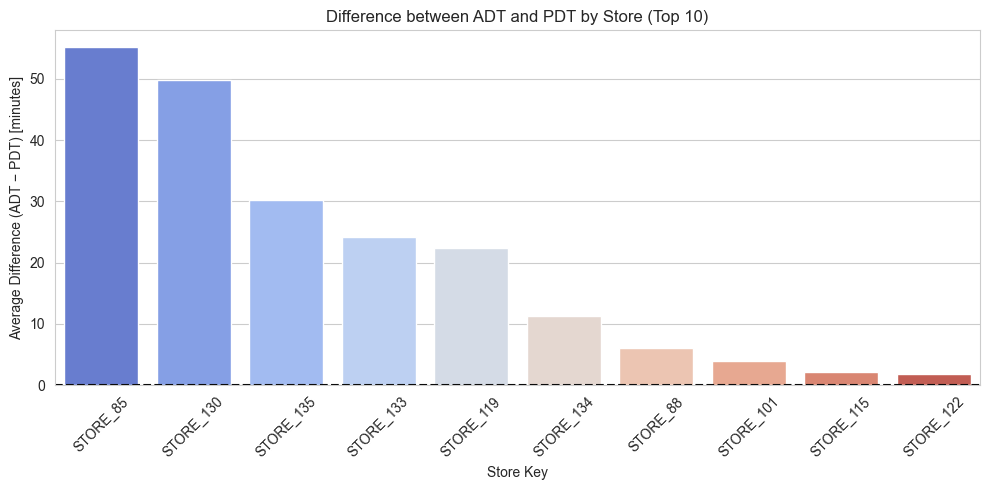

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=store_comparison.head(10), x='store_key', y='adt_minus_pdt', palette='coolwarm')
plt.title('Difference between ADT and PDT by Store (Top 10)')
plt.xlabel('Store Key')
plt.ylabel('Average Difference (ADT − PDT) [minutes]')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: brown;">**Check if there is 'pdt' difference in loyalty vs non-loyalty customers**</span>

In [53]:
df['loyalty_status'] = df['delivery_fee'].apply(lambda x: 'non_loyal' if x > 0 else 'loyal')

In [54]:
avg_pdt_loyalty = df.groupby('loyalty_status')['pdt'].mean().reset_index()
print(avg_pdt_loyalty)

  loyalty_status        pdt
0          loyal  44.390741
1      non_loyal  43.292880


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/1887780604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pdt_loyalty, x='loyalty_status', y='pdt', palette='coolwarm')


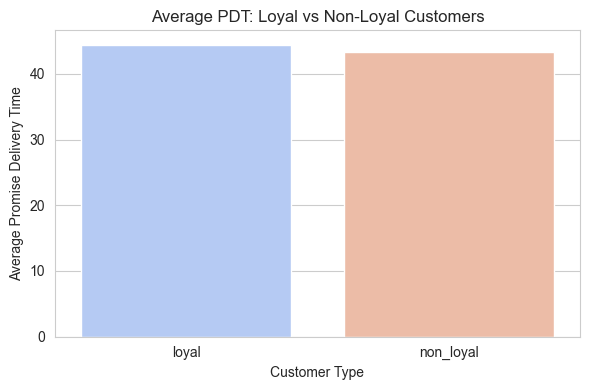

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=avg_pdt_loyalty, x='loyalty_status', y='pdt', palette='coolwarm')
plt.title('Average PDT: Loyal vs Non-Loyal Customers')
plt.xlabel('Customer Type')
plt.ylabel('Average Promise Delivery Time')
plt.tight_layout()
plt.show()

<span style="color: brown;">**Check if there is 'adt' difference in loyalty vs non-loyalty customers**</span>

In [56]:
avg_adt_loyalty = (
    df.groupby('loyalty_status')['adt_mins']
    .mean()
    .reset_index()
)

print(avg_adt_loyalty)

  loyalty_status   adt_mins
0          loyal  36.204437
1      non_loyal  34.982170


/var/folders/b4/37mclspn5hb08s778j8dsmpw0000gn/T/ipykernel_39783/571173886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adt_loyalty, x='loyalty_status', y='adt_mins', palette='crest')


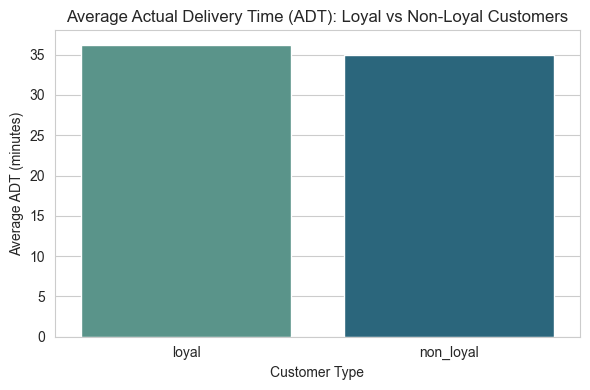

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=avg_adt_loyalty, x='loyalty_status', y='adt_mins', palette='crest')
plt.title('Average Actual Delivery Time (ADT): Loyal vs Non-Loyal Customers')
plt.xlabel('Customer Type')
plt.ylabel('Average ADT (minutes)')
plt.tight_layout()
plt.show()

In [58]:
avg_times_loyalty = (
    df.groupby('loyalty_status')[['adt_mins', 'pdt']]
    .mean()
    .reset_index()
)

In [59]:
avg_times_loyalty['diff_adt_pdt'] = avg_times_loyalty['adt_mins'] - avg_times_loyalty['pdt']
print(avg_times_loyalty)

  loyalty_status   adt_mins        pdt  diff_adt_pdt
0          loyal  36.204437  44.390741     -8.186304
1      non_loyal  34.982170  43.292880     -8.310710


***Both loyal and non-loyal customers have an average ADT lower than the PDT, meaning deliveries are generally completed faster than promised. However, loyal customers, who pay for a subscription, have a slightly higher ADT than non-loyal customers. This trend is concerning, as subscribed users typically expect faster or prioritized deliveries. It suggests the need to review operational processes for loyalty customers to ensure they receive the premium service they’re paying for.***

In [60]:
# Calculate percent difference (relative to PDT)
df['adt_pdt_pct_diff'] = ((df['adt_mins'] - df['pdt']) / df['pdt']) * 100

In [61]:
print(df['adt_pdt_pct_diff'].describe())

count    421278.000000
mean        -18.432743
std         100.573906
min        -198.571429
25%         -41.702899
50%         -27.728579
75%          -8.174603
max       29829.469697
Name: adt_pdt_pct_diff, dtype: float64


In [62]:
# Sort dataframe by absolute percentage difference (descending)
df_sorted = df.sort_values(by='adt_pdt_pct_diff', ascending=False)

# Display top 10 extreme cases
print(df_sorted[['Order_Key', 'adt_mins', 'pdt', 'adt_pdt_diff', 'adt_pdt_pct_diff', 'delivery_city', 'store_key']].head(10))

         Order_Key      adt_mins   pdt  adt_pdt_diff  adt_pdt_pct_diff  \
484255  ORD_439895  13168.966667  44.0  13124.966667      29829.469697   
512520  ORD_468160   8550.733333  54.0   8496.733333      15734.691358   
436836  ORD_392476   5582.000000  41.0   5541.000000      13514.634146   
354432  ORD_310072   4549.100000  34.0   4515.100000      13279.705882   
499422  ORD_455062   5830.416667  48.0   5782.416667      12046.701389   
367668  ORD_323308   7063.066667  59.0   7004.066667      11871.299435   
484915  ORD_440555   4274.966667  38.0   4236.966667      11149.912281   
423619  ORD_379259   4779.766667  45.0   4734.766667      10521.703704   
430894  ORD_386534   2740.666667  30.0   2710.666667       9035.555556   
480286  ORD_435926   2782.883333  37.0   2745.883333       7421.306306   

       delivery_city store_key  
484255        CITY_4  STORE_27  
512520        CITY_1  STORE_68  
436836        CITY_1  STORE_47  
354432        CITY_4  STORE_39  
499422        CITY_4

In [63]:
df['abs_pct_diff'] = df['adt_pdt_pct_diff'].abs()

within_10 = (df['abs_pct_diff'] <= 10).mean() * 100
within_20 = (df['abs_pct_diff'] <= 20).mean() * 100

print(f"Orders within ±10% difference: {within_10:.2f}%")
print(f"Orders within ±20% difference: {within_20:.2f}%")

Orders within ±10% difference: 13.88%
Orders within ±20% difference: 29.25%


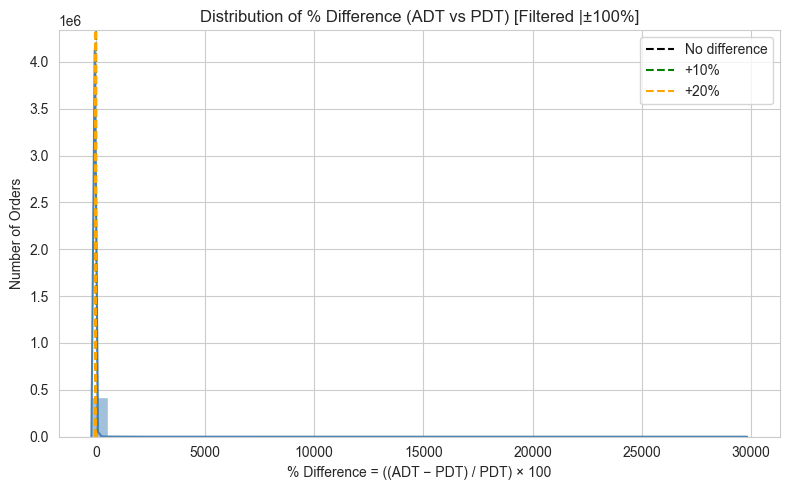

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['adt_pdt_pct_diff'], bins=40, kde=True, color='steelblue')
plt.axvline(0, color='black', linestyle='--', label='No difference')
plt.axvline(10, color='green', linestyle='--', label='+10%')
plt.axvline(-10, color='green', linestyle='--')
plt.axvline(20, color='orange', linestyle='--', label='+20%')
plt.axvline(-20, color='orange', linestyle='--')
plt.title('Distribution of % Difference (ADT vs PDT) [Filtered |±100%]')
plt.xlabel('% Difference = ((ADT − PDT) / PDT) × 100')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Count where actual delivery time < promised delivery time
faster_orders = (df['adt_mins'] < df['pdt']).sum()
total_orders = len(df)

print(f"Orders with ADT < PDT: {faster_orders}")
print(f"Total orders: {total_orders}")
print(f"Percentage: {(faster_orders / total_orders) * 100:.2f}%")

Orders with ADT < PDT: 343582
Total orders: 421278
Percentage: 81.56%


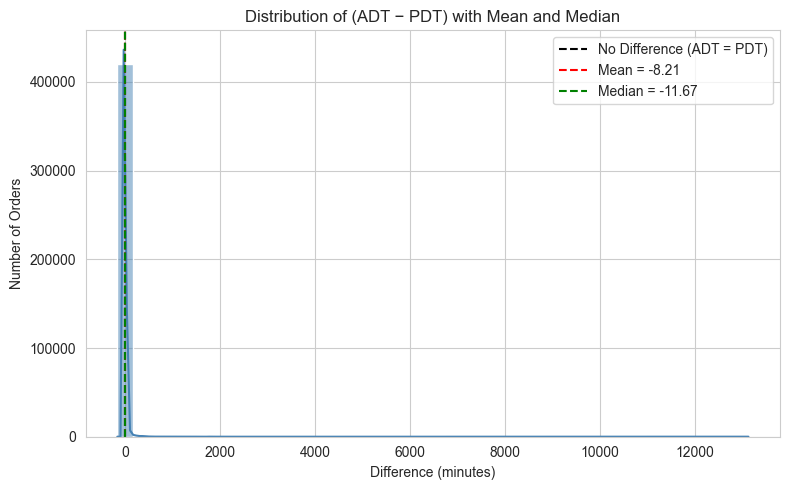

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(df['adt_pdt_diff'], bins=40, kde=True, color='steelblue')

# Add vertical reference lines
plt.axvline(0, color='black', linestyle='--', label='No Difference (ADT = PDT)')
plt.axvline(df['adt_pdt_diff'].mean(), color='red', linestyle='--', label=f"Mean = {df['adt_pdt_diff'].mean():.2f}")
plt.axvline(df['adt_pdt_diff'].median(), color='green', linestyle='--', label=f"Median = {df['adt_pdt_diff'].median():.2f}")

# Titles and labels
plt.title('Distribution of (ADT − PDT) with Mean and Median')
plt.xlabel('Difference (minutes)')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()

PDT summary:
 count    421278.000000
mean         44.147276
std           7.865470
min          20.000000
25%          39.000000
50%          44.000000
75%          49.000000
max         183.000000
Name: pdt, dtype: float64
Skewness: 0.615


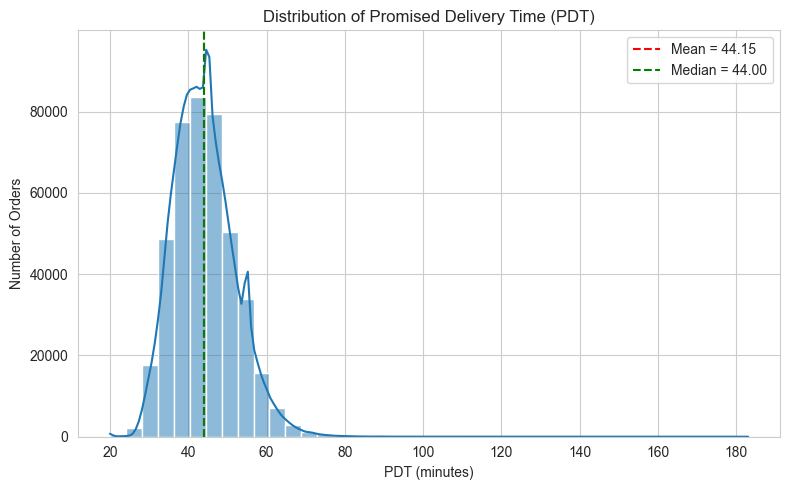

In [67]:
# Summary stats
pdt = pd.to_numeric(df['pdt'], errors='coerce').dropna()
print("PDT summary:\n", pdt.describe())
print(f"Skewness: {pdt.skew():.3f}")

# Histogram + KDE with mean/median lines
plt.figure(figsize=(8,5))
sns.histplot(pdt, bins=40, kde=True)
plt.axvline(pdt.mean(), color='red', linestyle='--', label=f"Mean = {pdt.mean():.2f}")
plt.axvline(pdt.median(), color='green', linestyle='--', label=f"Median = {pdt.median():.2f}")
plt.title('Distribution of Promised Delivery Time (PDT)')
plt.xlabel('PDT (minutes)')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()

***For all the categories except one(across stores) that we considered above, the average actual delivery time is always less that the promise delivery time , which means deliveries were completed faster than promised. This can be a reliability buffer, i.e. the company is setting pdt on conservative side to ensure reliability and customer satisfaction. Faster than promised deliveries usually delight the customers. Also, many companies intentionally pad PDTs to allow for traffic, reduce late delivery penalities etc*** <br>
***There is also downside to this- longer pdts' make the service look slower, i.e. you may lose orders from customers who check delivery time before ordering. It means over-allocation of time slots implying lower driver utilization.It can also lead to misleading KPIs, i.e. if the buffer is very high, your on-time rate looks great, but it masks performance variation(~82% of orders have adt < pdt).***

***The difference between Actual Delivery Time (ADT) and Promised Delivery Time (PDT) is highly right-skewed, with some values exceeding 12,000 minutes. Similarly, the percentage difference shows extreme outliers (up to 30,000%), which are unrealistic in the context of food delivery.</br>
This pattern can be attributed to two main factors. First, PDTs are often set conservatively, with added buffer time to ensure on-time delivery. Second, scheduled orders - such as groceries, cakes, or catering - naturally have much longer delivery windows, as they are intentionally planned for a future time or date based on customer preference. These extended durations are not operational delays but part of the service design.</br>
While it is reasonable to keep PDTs slightly conservative, the current buffer appears excessive and could be optimized. In cases where ADT is much greater than PDT, the issue may lie in inaccurate or inconsistent PDT assignment, indicating that PDTs should be dynamically predicted based on order characteristics to reflect realistic expectations.</br>
Because scheduled orders distort overall delivery-time analysis, they should be segmented and analyzed separately from on-demand deliveries. Including them in general PDT-ADT comparisons can artificially inflate averages and misrepresent actual performance.</br>
To improve accuracy, maintaining a buffer of around ±20% or ±20 minutes would provide a more balanced reflection of real delivery times. This can be achieved by developing a predictive model that uses ADT as the target variable and then adds a fixed or percentage-based buffer to its predictions to generate a more realistic and customer-focused PDT.***